# Keany Strategic Operations Project Mock Data

This notebook contains SKU optimization, labor forecasting, and market fulfillment modeling for new geographic markets (Raleigh, Richmond, Charleston, Charlotte) as part of the strategic operations internship project.

## 1. SKU Performance Simulation and Scoring

In the first section, I have simulated SKU-level operational data—things like margin, case velocity, labor intensity, and cost to serve. Each SKU is scored using a weighted formula, helping us identify which products are operationally efficient and which ones may be adding friction.

In [51]:
import pandas as pd
import numpy as np


sku_ids = [f"SKU{i+101}" for i in range(20)]
categories = ["Hand-Cut Produce", "Protein", "Specialty"]
sku_data = []

np.random.seed(42)
for sku in sku_ids:
    category = np.random.choice(categories)
    margin = round(np.random.uniform(0.15, 0.45), 2)
    velocity = np.random.randint(100, 1000)
    labor_intensity = np.random.choice(["Low", "Medium", "High"], p=[0.3, 0.5, 0.2])
    yield_pct = round(np.random.uniform(0.75, 0.98), 2)
    cost_to_serve = round(np.random.uniform(1.5, 5.0), 2)
    customer_loyalty = round(np.random.uniform(0.6, 1.0), 2)
    bundling_factor = round(np.random.uniform(0.8, 1.2), 2)

    sku_data.append([
        sku, category, margin, velocity, labor_intensity,
        yield_pct, cost_to_serve, customer_loyalty, bundling_factor
    ])

sku_df = pd.DataFrame(sku_data, columns=[
    "SKU ID", "Category", "Margin %", "Monthly Velocity (cases)", "Labor Intensity",
    "Yield %", "Cost to Serve ($)", "Customer Loyalty", "Bundling Factor"
])

labor_map = {"Low": 1, "Medium": 2, "High": 3}
sku_df["Labor Score"] = sku_df["Labor Intensity"].map(labor_map)

sku_df["Score"] = (
    (sku_df["Margin %"] * 100 * 0.25) +
    (sku_df["Monthly Velocity (cases)"] / 10 * 0.2) +
    (sku_df["Yield %"] * 100 * 0.15) +
    (sku_df["Customer Loyalty"] * 100 * 0.1) +
    (sku_df["Bundling Factor"] * 100 * 0.1) -
    (sku_df["Cost to Serve ($)"] * 10 * 0.1) -
    (sku_df["Labor Score"] * 10 * 0.1)
)

median_margin = sku_df["Margin %"].median()
median_velocity = sku_df["Monthly Velocity (cases)"].median()

def classify_quadrant(row):
    if row["Margin %"] >= median_margin and row["Monthly Velocity (cases)"] >= median_velocity:
        return "High Margin, High Velocity"
    elif row["Margin %"] >= median_margin:
        return "High Margin, Low Velocity"
    elif row["Monthly Velocity (cases)"] >= median_velocity:
        return "Low Margin, High Velocity"
    else:
        return "Low Margin, Low Velocity"

sku_df["Quadrant"] = sku_df.apply(classify_quadrant, axis=1)
sku_df


,SKU ID,Category,Margin %,Monthly Velocity (cases),Labor Intensity,Yield %,Cost to Serve ($),Customer Loyalty,Bundling Factor,Labor Score,Score,Quadrant
0,SKU101,Specialty,0.39,370,Medium,0.89,2.05,0.66,0.82,2,41.25,"High Margin, Low Velocity"
1,SKU102,Hand-Cut Produce,0.33,763,Medium,0.76,4.03,0.98,0.80,2,46.68,"High Margin, High Velocity"
2,SKU103,Hand-Cut Produce,0.34,413,Medium,0.85,2.52,0.84,0.86,2,41.99,"High Margin, Low Velocity"
3,SKU104,Specialty,0.29,786,Medium,0.84,4.94,0.79,1.14,2,47.93,"Low Margin, High Velocity"
4,SKU105,Specialty,0.20,266,Low,0.97,3.47,0.75,0.81,1,36.00,"Low Margin, Low Velocity"
5,SKU106,Protein,0.36,466,Medium,0.89,4.42,0.67,0.96,2,41.55,"High Margin, High Velocity"
6,SKU107,Protein,0.35,101,Medium,0.80,3.49,0.61,1.14,2,34.78,"High Margin, Low Velocity"
7,SKU108,Protein,0.27,369,Medium,0.83,3.50,0.81,1.18,2,40.98,"Low Margin, Low Velocity"
8,SKU109,Hand-Cut Produce,0.27,437,Medium,0.88,4.88,0.84,0.91,2,39.31,"Low Margin, Low Velocity"
9,SKU110,Hand-Cut Produce,0.39,164,Low,0.85,2.88,0.72,0.81,1,37.20,"High Margin, Low Velocity"


Customer Loyalty Score = (Avg. Reorder Frequency of SKU) / (Max SKU Reorder Frequency)

Bundling Factor = (No of Orders SKU Appears with Bundled Items) / (Total Orders for SKU)

## 2. SKU Performance Quadrant Visualization
This scatterplot plots SKUs by margin and velocity, categorizing them into four quadrants. The ideal SKUs are in the top right: high margin, high velocity. Those in the bottom left may need to be phased out or improved, while others could be selectively scaled based on market fit.

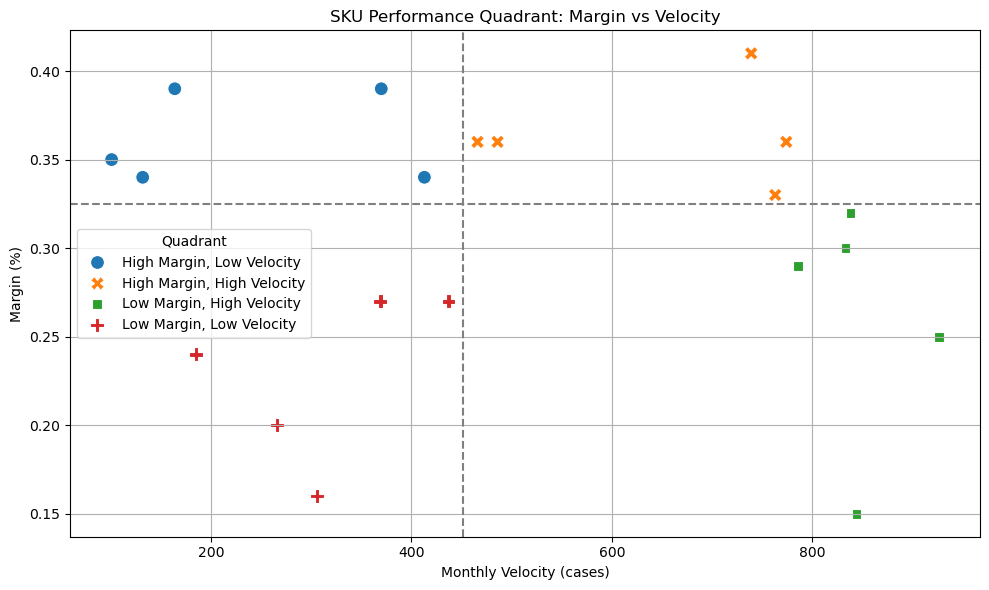

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sku_df,
    x="Monthly Velocity (cases)",
    y="Margin %",
    hue="Quadrant",
    style="Quadrant",
    s=100
)

plt.axvline(median_velocity, color='gray', linestyle='--')
plt.axhline(median_margin, color='gray', linestyle='--')
plt.title("SKU Performance Quadrant: Margin vs Velocity")
plt.xlabel("Monthly Velocity (cases)")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Utilizing the Score Metric 

In [53]:
def score_to_recommendation(score):
    if score >= 50:
        return "Promote"
    elif score >= 40:
        return "Review"
    else:
        return "Phase Out"

sku_df["Recommendation"] = sku_df["Score"].apply(score_to_recommendation)

# Strategic Recommendation combining Quadrant and other factors
def enhanced_recommendation(row):
    if row["Quadrant"] == "High Margin, High Velocity":
        if row["Score"] >= 50:
            return "⭐ Scale aggressively — core growth driver"
        else:
            return "⚙️ Monitor efficiency, optimize yield or labor"
    elif row["Quadrant"] == "High Margin, Low Velocity":
        if row["Customer Loyalty"] >= 0.85:
            return "📦 Niche loyalty play — bundle with fast movers"
        else:
            return "📉 Improve visibility or reprice"
    elif row["Quadrant"] == "Low Margin, High Velocity":
        if row["Bundling Factor"] >= 1.1:
            return "🛒 Loss leader — keep as bundle anchor"
        else:
            return "💸 Review pricing or streamline ops"
    else:  # Low Margin, Low Velocity
        if row["Score"] < 40:
            return "⛔ Consider phasing out"
        else:
            return "🧐 Reassess SKU positioning or usage"

sku_df["Strategic Recommendation"] = sku_df.apply(enhanced_recommendation, axis=1)

# Final summary view
final_summary_df = sku_df[[
    "SKU ID", "Category", "Score", "Quadrant", "Recommendation", "Strategic Recommendation"
]].sort_values(by="Score", ascending=False)

final_summary_df

,SKU ID,Category,Score,Quadrant,Recommendation,Strategic Recommendation
12,SKU113,Specialty,52.55,"Low Margin, High Velocity",Promote,🛒 Loss leader — keep as bundle anchor
14,SKU115,Hand-Cut Produce,51.72,"Low Margin, High Velocity",Promote,🛒 Loss leader — keep as bundle anchor
10,SKU111,Specialty,51.39,"High Margin, High Velocity",Promote,⭐ Scale aggressively — core growth driver
18,SKU119,Protein,51.26,"Low Margin, High Velocity",Promote,🛒 Loss leader — keep as bundle anchor
16,SKU117,Protein,49.12,"High Margin, High Velocity",Review,"⚙️ Monitor efficiency, optimize yield or labor"
3,SKU104,Specialty,47.93,"Low Margin, High Velocity",Review,🛒 Loss leader — keep as bundle anchor
1,SKU102,Hand-Cut Produce,46.68,"High Margin, High Velocity",Review,"⚙️ Monitor efficiency, optimize yield or labor"
17,SKU118,Protein,45.81,"Low Margin, High Velocity",Review,💸 Review pricing or streamline ops
19,SKU120,Protein,45.79,"High Margin, High Velocity",Review,"⚙️ Monitor efficiency, optimize yield or labor"
2,SKU103,Hand-Cut Produce,41.99,"High Margin, Low Velocity",Review,📉 Improve visibility or reprice


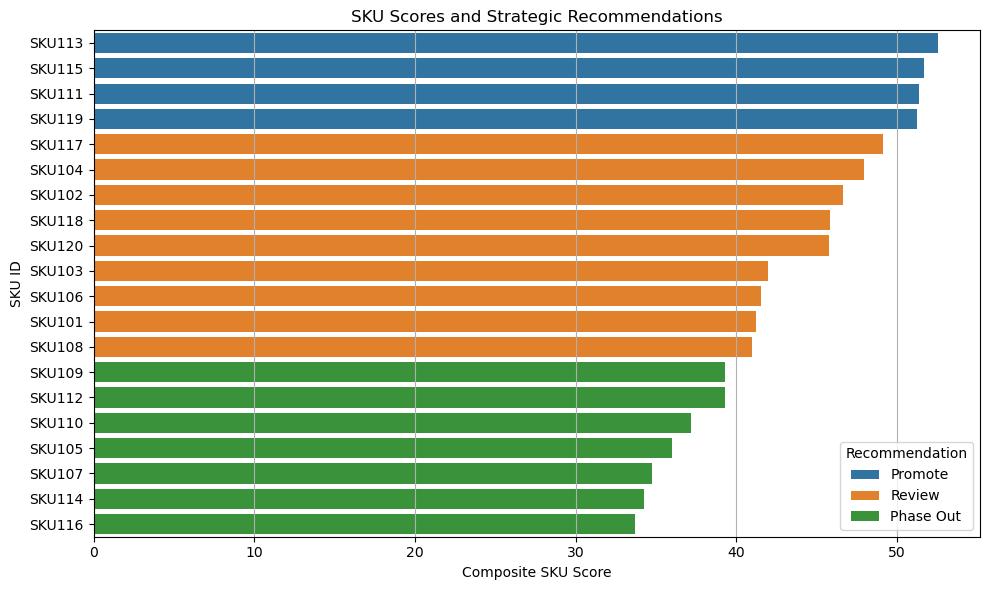

In [32]:
# Visualization of Score distribution and decisions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary_df,
    x="Score",
    y="SKU ID",
    hue="Recommendation",
    dodge=False
)
plt.title("SKU Scores and Strategic Recommendations")
plt.xlabel("Composite SKU Score")
plt.ylabel("SKU ID")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## 3.Simulate Volume Ramp-Up for New Markets

In this section, I’ve simulated customer growth and order ramp-up over the first six months for each target market. The goal here is to estimate how volume evolves month over month, so we can plan delivery capacity, labor, and logistics more accurately from day one.

In [45]:
# Simulated ramp-up data for 4 markets over 6 months

markets = ["Charlotte", "Charleston", "Richmond", "Raleigh"]
base_customers = [20, 15, 25, 18]
growth_rates = [1.3, 1.25, 1.4, 1.35]
avg_order_size = [50, 52, 48, 51]
seasonality_factors = [1.0, 0.95, 1.1, 1.05]

simulation_data = []

for i, market in enumerate(markets):
    for month in range(6):
        customer_count = int(base_customers[i] * (growth_rates[i] ** month))
        monthly_order_size = avg_order_size[i] + month * 2
        volume = customer_count * monthly_order_size * seasonality_factors[i]
        labor_hours = volume * 0.05
        simulation_data.append([
            market, f"M{month+1}", customer_count, round(volume), round(labor_hours)
        ])

market_df = pd.DataFrame(simulation_data, columns=[
    "Market", "Month", "Projected Customers", "Projected Volume (cases)", "Estimated Labor Hours"
])
market_df

,Market,Month,Projected Customers,Projected Volume (cases),Estimated Labor Hours
0,Charlotte,M1,20,1000,50
1,Charlotte,M2,26,1352,68
2,Charlotte,M3,33,1782,89
3,Charlotte,M4,43,2408,120
4,Charlotte,M5,57,3306,165
5,Charlotte,M6,74,4440,222
6,Charleston,M1,15,741,37
7,Charleston,M2,18,923,46
8,Charleston,M3,23,1224,61
9,Charleston,M4,29,1598,80


## 4. Deriving Entry Strategy Based on Projected Volume 

In [54]:
def market_strategy(vol):
    if vol >= 10000:
        return "🛠️ Setup dedicated route + warehouse team"
    elif vol >= 5000:
        return "🚚 Share routes from nearby DC, monitor ramp-up"
    else:
        return "📦 Use 3PL or test with limited SKUs"

latest_month = market_df[market_df["Month"] == "M6"].copy()
latest_month["Entry Strategy"] = latest_month["Projected Volume (cases)"].apply(market_strategy)
latest_month

,Market,Month,Projected Customers,Projected Volume (cases),Estimated Labor Hours,Entry Strategy
5,Charlotte,M6,74,4440,222,📦 Use 3PL or test with limited SKUs
11,Charleston,M6,45,2650,133,📦 Use 3PL or test with limited SKUs
17,Richmond,M6,134,8549,427,"🚚 Share routes from nearby DC, monitor ramp-up"
23,Raleigh,M6,80,5124,256,"🚚 Share routes from nearby DC, monitor ramp-up"


## 5. Labor Forecasting by SKU
Labor forecasting is a critical step. Here I’ve estimated labor hours required per SKU based on their complexity. SKUs with higher velocity and higher labor intensity drive most of the warehouse workload. This sets the foundation for monthly labor planning by market.

In [55]:
labor_hours_map = {"Low": 4, "Medium": 7, "High": 10}
sku_df["Labor Hours/100 Cases"] = sku_df["Labor Intensity"].map(labor_hours_map)
sku_df["Monthly Labor Hours"] = (sku_df["Monthly Velocity (cases)"] / 100) * sku_df["Labor Hours/100 Cases"]
sku_df[["SKU ID", "Monthly Velocity (cases)", "Labor Intensity", "Monthly Labor Hours"]]

,SKU ID,Monthly Velocity (cases),Labor Intensity,Monthly Labor Hours
0,SKU101,370,Medium,25.90
1,SKU102,763,Medium,53.41
2,SKU103,413,Medium,28.91
3,SKU104,786,Medium,55.02
4,SKU105,266,Low,10.64
5,SKU106,466,Medium,32.62
6,SKU107,101,Medium,7.07
7,SKU108,369,Medium,25.83
8,SKU109,437,Medium,30.59
9,SKU110,164,Low,6.56


## 6. Visualize Labor Demand by SKU
To make it actionable, I’ve visualized the top labor-consuming SKUs here. It’s clear which SKUs will demand the most warehouse time, and this helps with staff scheduling, cross-training, or even reviewing whether the SKU can be simplified in its preparation.

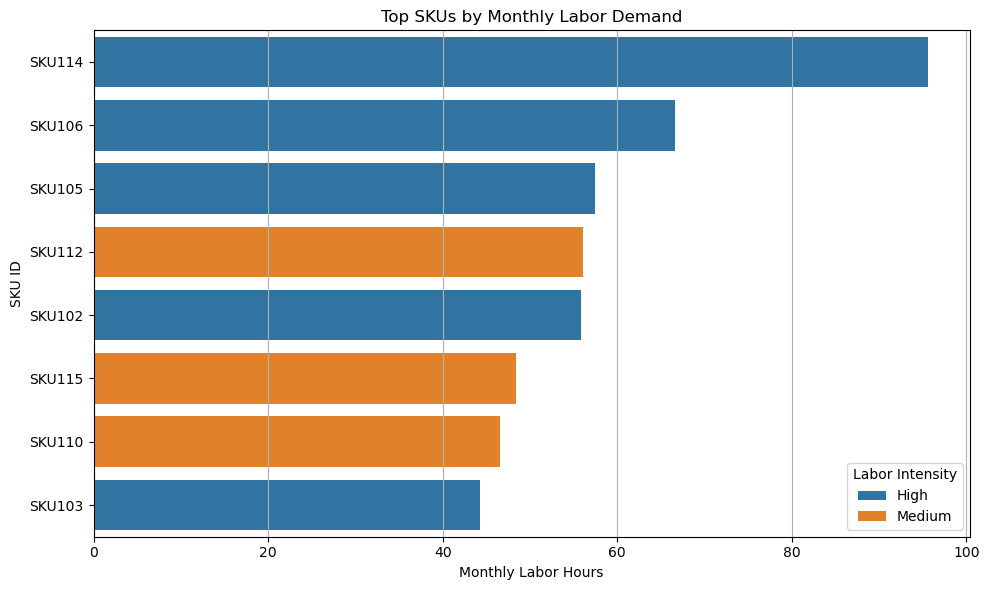

In [11]:
top_skus = sku_df.sort_values(by="Monthly Labor Hours", ascending=False).head(8)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_skus,
    x="Monthly Labor Hours",
    y="SKU ID",
    hue="Labor Intensity",
    dodge=False
)

plt.title("Top SKUs by Monthly Labor Demand")
plt.xlabel("Monthly Labor Hours")
plt.ylabel("SKU ID")
plt.legend(title="Labor Intensity")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

## 7. Building a Pricing Gap Matrix

In [22]:
import pandas as pd

# Create the data
data = {
    "SKU": ["Truffle Oil 250ml", "Microgreens Mix", "Imported Burrata"],
    "Keany Price ($/unit)": [14.00, 7.50, 5.80],
    "Competitor 1": [16.00, 6.50, 6.00],
    "Competitor 2": [15.50, 6.75, 5.50]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate Market Avg, Gap ($), Gap (%), Recommendation
df["Market Avg"] = df[["Competitor 1", "Competitor 2"]].mean(axis=1)
df["Gap ($)"] = round(df["Keany Price ($/unit)"] - df["Market Avg"], 2)
df["Gap (%)"] = round((df["Gap ($)"] / df["Market Avg"]) * 100, 1)

# Generate recommendations
def get_recommendation(row):
    if row["Gap (%)"] < -10:
        return "Raise price by $1–2"
    elif row["Gap (%)"] > 10:
        return "Justify premium or lower"
    elif abs(row["Gap (%)"]) <= 5:
        return "Keep as is"
    else:
        return "Monitor"

df["Recommendation"] = df.apply(get_recommendation, axis=1)
df

,SKU,Keany Price ($/unit),Competitor 1,Competitor 2,Market Avg,Gap ($),Gap (%),Recommendation
0,Truffle Oil 250ml,14.0,16.0,15.50,15.750,-1.75,-11.1,Raise price by $1–2
1,Microgreens Mix,7.5,6.5,6.75,6.625,0.88,13.3,Justify premium or lower
2,Imported Burrata,5.8,6.0,5.50,5.750,0.05,0.9,Keep as is


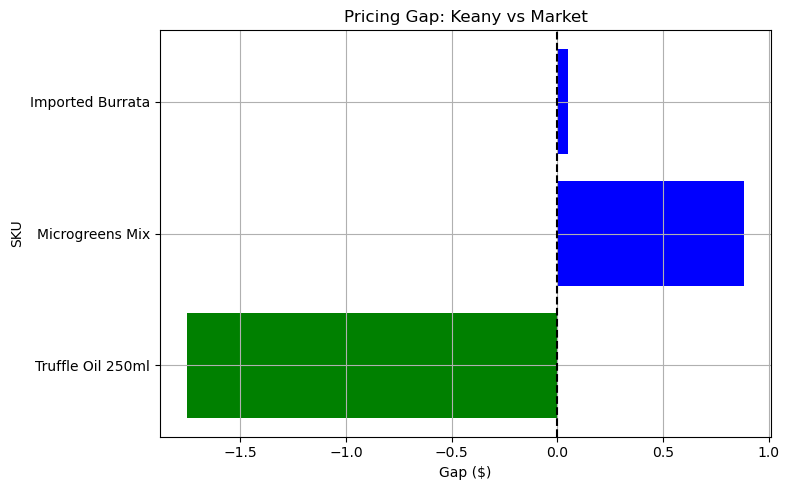

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(df["SKU"], df["Gap ($)"], color=['green' if x < 0 else 'blue' for x in df["Gap ($)"]])
plt.axvline(0, color='black', linestyle='--')
plt.title("Pricing Gap: Keany vs Market")
plt.xlabel("Gap ($)")
plt.ylabel("SKU")
plt.grid(True)
plt.tight_layout()
plt.show()